In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing prepared data from data wrangling
data = pd.read_csv(r'../data/purchases.csv', index_col= 0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15235 entries, 0 to 15263
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          15235 non-null  int64  
 1   CustomerGender      15235 non-null  object 
 2   ProductName         15235 non-null  object 
 3   ProductPrice        15235 non-null  float64
 4   CostOfGood          15235 non-null  float64
 5   ProductCategory     15235 non-null  object 
 6   CustomerCountry     15235 non-null  object 
 7   CustomerContinent   15235 non-null  object 
 8   OrderTime           15235 non-null  object 
 9   OrderDay            15235 non-null  int64  
 10  OrderMonth          15235 non-null  object 
 11  QuantitySold        15235 non-null  int64  
 12  discountPercentage  15235 non-null  float64
 13  salePrice           15235 non-null  float64
 14  OrderYear           15235 non-null  int64  
 15  ExpectedProfit      15235 non-null  float64
 16  Pric

In [4]:
data.head()

,CustomerId,CustomerGender,ProductName,ProductPrice,CostOfGood,ProductCategory,CustomerCountry,CustomerContinent,OrderTime,OrderDay,OrderMonth,QuantitySold,discountPercentage,salePrice,OrderYear,ExpectedProfit,PricePerQuantity,dateOfPurchase,ProfitMade
0,4070,Female,Hat,713.0,249.55,Movies,Seychelles,Africa,13:43:00,1,February,3,9.0,1946.49,2017,463.45,648.83,2017-02-01,1197.84
1,2530,Female,Cheese,60.0,47.40,Health,Qatar,Asia,12:25:00,11,February,5,2.0,294.00,2020,12.60,58.80,2020-02-11,57.00
2,2697,Male,Chips,310.0,145.70,Sports,Cameroon,Africa,20:14:00,25,September,2,3.0,601.40,2020,164.30,300.70,2020-09-25,310.00
3,2405,Female,Chair,468.0,149.76,Beauty,Guadeloupe,North America,13:13:00,30,June,1,10.0,421.20,2020,318.24,421.20,2020-06-30,271.44
4,4394,Male,Chicken,360.0,140.40,Health,Swaziland,Africa,22:50:00,28,September,6,8.0,1987.20,2020,219.60,331.20,2020-09-28,1144.80


In [5]:
# data["OrderYear"] = pd.to_datetime(data["OrderYear"])
# data["OrderYear"] = data["OrderYear"].dt.year

In [6]:
data.head()

,CustomerId,CustomerGender,ProductName,ProductPrice,CostOfGood,ProductCategory,CustomerCountry,CustomerContinent,OrderTime,OrderDay,OrderMonth,QuantitySold,discountPercentage,salePrice,OrderYear,ExpectedProfit,PricePerQuantity,dateOfPurchase,ProfitMade
0,4070,Female,Hat,713.0,249.55,Movies,Seychelles,Africa,13:43:00,1,February,3,9.0,1946.49,2017,463.45,648.83,2017-02-01,1197.84
1,2530,Female,Cheese,60.0,47.40,Health,Qatar,Asia,12:25:00,11,February,5,2.0,294.00,2020,12.60,58.80,2020-02-11,57.00
2,2697,Male,Chips,310.0,145.70,Sports,Cameroon,Africa,20:14:00,25,September,2,3.0,601.40,2020,164.30,300.70,2020-09-25,310.00
3,2405,Female,Chair,468.0,149.76,Beauty,Guadeloupe,North America,13:13:00,30,June,1,10.0,421.20,2020,318.24,421.20,2020-06-30,271.44
4,4394,Male,Chicken,360.0,140.40,Health,Swaziland,Africa,22:50:00,28,September,6,8.0,1987.20,2020,219.60,331.20,2020-09-28,1144.80


In [7]:
data = data.sort_values("OrderYear")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15235 entries, 5107 to 2301
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          15235 non-null  int64  
 1   CustomerGender      15235 non-null  object 
 2   ProductName         15235 non-null  object 
 3   ProductPrice        15235 non-null  float64
 4   CostOfGood          15235 non-null  float64
 5   ProductCategory     15235 non-null  object 
 6   CustomerCountry     15235 non-null  object 
 7   CustomerContinent   15235 non-null  object 
 8   OrderTime           15235 non-null  object 
 9   OrderDay            15235 non-null  int64  
 10  OrderMonth          15235 non-null  object 
 11  QuantitySold        15235 non-null  int64  
 12  discountPercentage  15235 non-null  float64
 13  salePrice           15235 non-null  float64
 14  OrderYear           15235 non-null  int64  
 15  ExpectedProfit      15235 non-null  float64
 16  Pr

In [9]:
all_columns = data.columns.to_list()

In [10]:
data["OrderYear"] = data["OrderYear"].astype('str')
# data["OrderYear"] = data["OrderYear"] + "Year-"

# Revenue Growth

[]

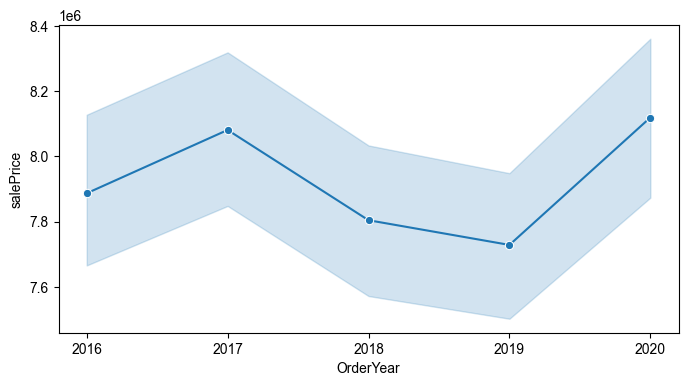

In [11]:
#revenue growth over time - years
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data, x = "OrderYear", y = "salePrice", estimator = "sum", marker = "o", ax = ax)
plt.plot()

[]

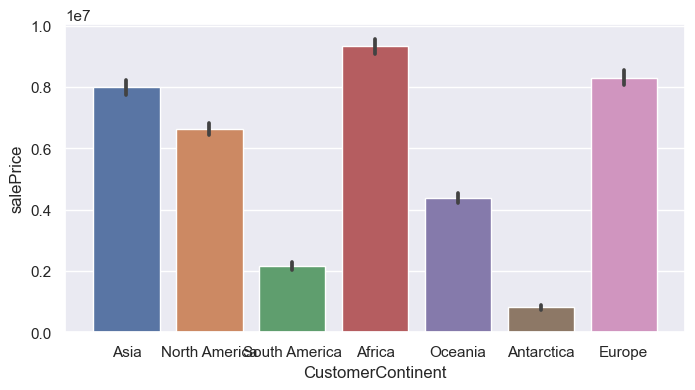

In [12]:
#revenue per continent
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =data, x = "CustomerContinent", y = "salePrice", estimator = "sum", ax = ax)
plt.plot()

In [13]:
year_on_year = data.groupby(["OrderMonth", "OrderYear"]).agg(
    totalRevenue=pd.NamedAgg(column='salePrice', aggfunc='sum'),
    totalProfit=pd.NamedAgg(column='ProfitMade', aggfunc='sum'),
    totalQuantityPurchased = pd.NamedAgg(column='QuantitySold', aggfunc='sum'),
    customerCount = pd.NamedAgg(column='CustomerId', aggfunc='nunique'),
                            )


In [14]:
year_on_year.head(10)

totalRevenue  totalProfit  totalQuantityPurchased  \
OrderMonth OrderYear                                                      
April      2016          663100.04    301607.72                    1407   
           2017          704002.09    316665.42                    1481   
           2018          643665.54    293194.56                    1455   
           2019          596165.19    255079.52                    1362   
           2020          631584.95    276844.26                    1256   
August     2016          729370.71    325474.04                    1554   
           2017          656815.45    291827.66                    1332   
           2018          608229.01    271635.03                    1342   
           2019          572092.33    247219.24                    1291   
           2020          682399.34    317187.13                    1476   

                      customerCount  
OrderMonth OrderYear                 
April      2016                 255  
           2017                 267  
           2018                 261  
           2019                 243  
           2020                 228  
August     2016                 253  
           2017                 236  
           2018                 244  
           2019                 226  
           2020                 264

[]

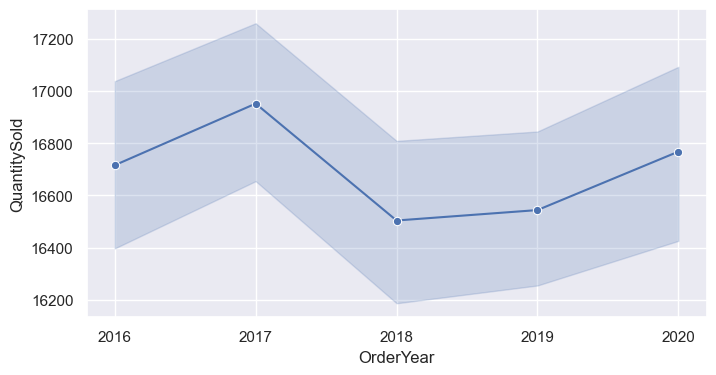

In [15]:
#product quantities sold over time
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data, x = "OrderYear", y = "QuantitySold", estimator = "sum", marker = "o", ax = ax)

# label points on the plot
for x, y in zip(data["OrderYear"], ax.patches):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, y = y-150, s = '{:.0f}'.format(y), color = 'purple') # set colour of line
plt.plot()

# Customer Analysis

[]

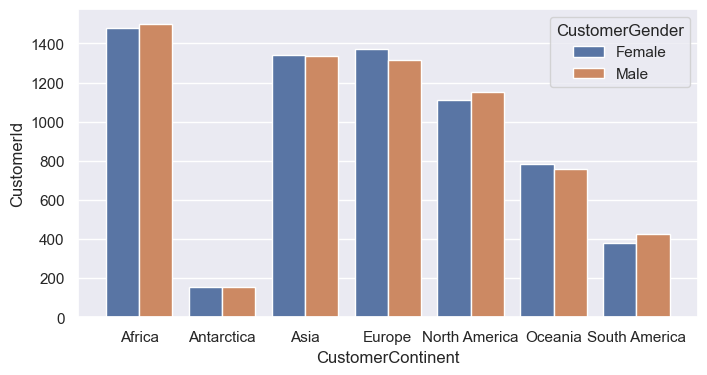

In [19]:
#unique count of customers per continent
customers = data.groupby(["CustomerContinent", "CustomerGender"])["CustomerId"].nunique()
customers = customers.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =customers, x = "CustomerContinent", y = "CustomerId", estimator = "sum", ax = ax, hue = "CustomerGender")
plt.plot()

[]

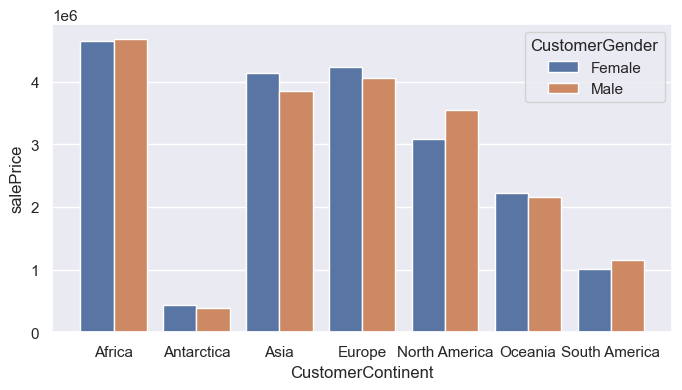

In [27]:
#revenue generated per region by gender
customersRev = data.groupby(["CustomerContinent", "CustomerGender"])["salePrice"].sum()
customersRev = customersRev.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =customersRev, x = "CustomerContinent", y = "salePrice", estimator = "sum", ax = ax, hue = "CustomerGender")
plt.plot()

In [28]:
#correlation between customer count and revenue

[]

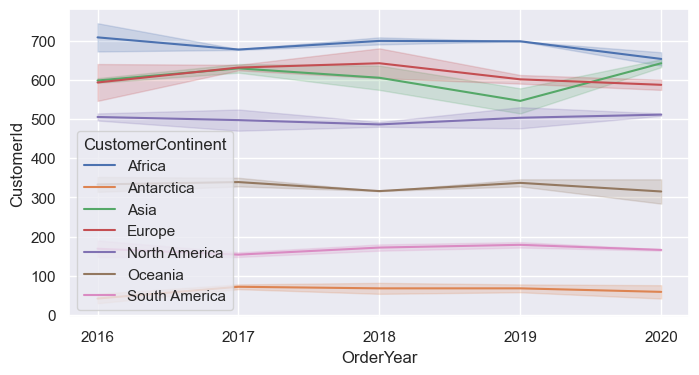

In [29]:
#customer growth over timer per region/continent
customersGrowth = data.groupby(["CustomerContinent", "CustomerGender", "OrderYear"])["CustomerId"].nunique()
customersGrowth = customersGrowth.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data =customersGrowth, x = "OrderYear", y = "CustomerId", estimator = "sum", ax = ax, hue = "CustomerContinent")
plt.plot()

[]

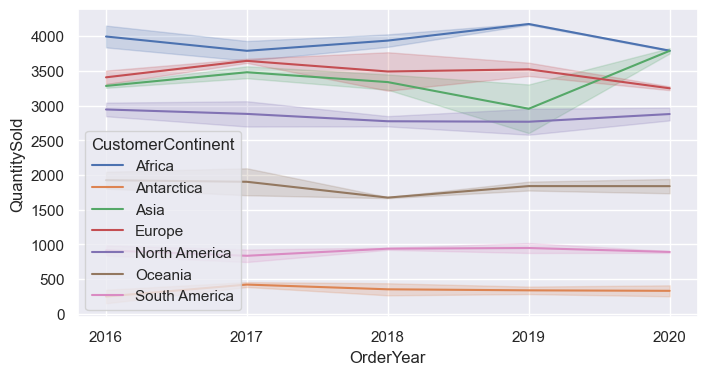

In [34]:
#demand growth
demandGrowth = data.groupby(["CustomerContinent", "CustomerGender", "OrderYear"])["QuantitySold"].sum()
demandGrowth = demandGrowth.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data =demandGrowth, x = "OrderYear", y = "QuantitySold", estimator = "sum", ax = ax, hue = "CustomerContinent")
plt.plot()

Customer Attrition

In [ ]:
#customer acquisition

In [ ]:
#customer attrition

In [ ]:
#customer retention

Product Sales

In [35]:
#top 10 categories - revenue generators

In [36]:
# top 5 categories per continent

In [ ]:
#top 10 producs purchased by females

In [ ]:
# top 10 products purchased by males

In [ ]:
#least sold products per continent

In [ ]:
#least sold products per gender

# Time Series Analysis

In [37]:
# date range and frequency of data
data["dateOfPurchase"].min()

'2016-01-01'

In [38]:
data["dateOfPurchase"].max()

'2020-12-30'

In [39]:
data["dateOfPurchase"].nunique()

1791

In [45]:
data["dateOfPurchase"] = pd.to_datetime(data["dateOfPurchase"])

In [51]:
# data["monthYear"] = data["dateOfPurchase"].dt.to_period('M')
data['monthYear']=[d.strftime('%Y-%m') for d in data['dateOfPurchase']]

[]

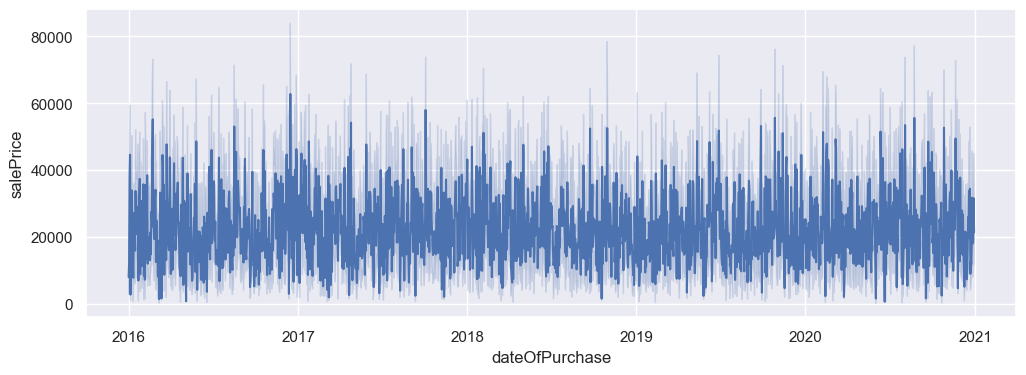

In [59]:
# time series plot with daily data
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data =data, x = "dateOfPurchase", y = "salePrice", estimator = "sum", ax = ax)
plt.plot()

In [57]:
data = data.sort_values("dateOfPurchase")

[]

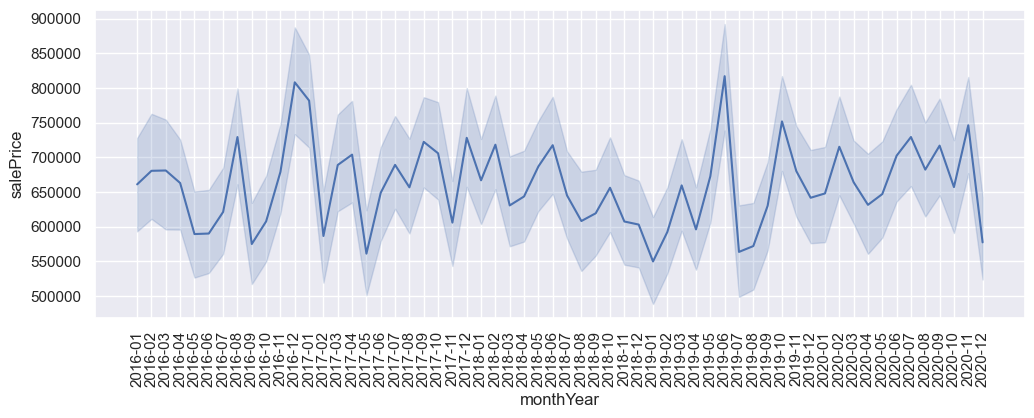

In [58]:
#time series over month-year
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data =data, x = "monthYear", y = "salePrice", estimator = "sum", ax = ax)
plt.xticks(rotation=90)
plt.plot()

# Financial Analysis

In [ ]:
# investments made in discounts per year

In [ ]:
# correlation btn investments in discounts and revenue growth

In [ ]:
# pricing response to product cost and market response

In [ ]:
# discount range analysis

In [ ]:
#year-on-year growth rate